## Setting up environment

We install HuggingFace Transformers and Detectron2.

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
!pip install -q pyyaml --upgrade
# !pip install -q torch==1.11.0+cu113 torchvision==0.13.0+cu113 -f https://download.pytorch.org/whl/torch_stable.html
# !pip install --upgrade packaging jupyter-lsp jupyterlab shapely numpy scipy
# Install compatible Detectron2 version
# !pip install -q detectron2==0.11.2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu113/torch1.11/index.html

# Consider optional dependencies (adapt based on your project's needs)
!pip install -q matplotlib opencv-python pycocotools numpy scipy

!pip install -q torch torchvision --index-url https://download.pytorch.org/whl/cu118
!pip install -q 'git+https://github.com/facebookresearch/detectron2.git'

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
# !pip install -q detectron2==0.14.0 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu117/torch1.14/index.html

In [ ]:
!pip install -q datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.5 MB/s eta 0:00:00


We also install PyTesseract:

In [ ]:
! sudo apt install tesseract-ocr
! pip install -q pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,486 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

## Getting the data

Next, we download a small subset of the RVL-CDIP dataset (which I prepared), containing 15 documents (one example per class). I omitted the "handwritten" class, because the OCR results were mediocre.


In [ ]:
import requests, zipfile, io

def download_data():
    url = "https://www.dropbox.com/scl/fi/78vac7zjuhy3sng8c0gk1/RVL_CDIP_ten_example_per_class.zip?rlkey=24rnscmmjconmne0khs8r05a1&dl=1"
    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall()

download_data()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Let's look at a random training example (in this case, a resume):


In [ ]:
!pip install --upgrade Pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.


In [ ]:
!apt-get install -y libtiff5
!pip uninstall -y Pillow
!pip install Pillow


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libtiff5 is already the newest version (4.3.0-6ubuntu0.7).
libtiff5 set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Found existing installation: pillow 10.2.0
Uninstalling pillow-10.2.0:
  Successfully uninstalled pillow-10.2.0
  Using cached pillow-10.2.0-cp310-cp310-manylinux_2_28_x86_64.whl (4.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.


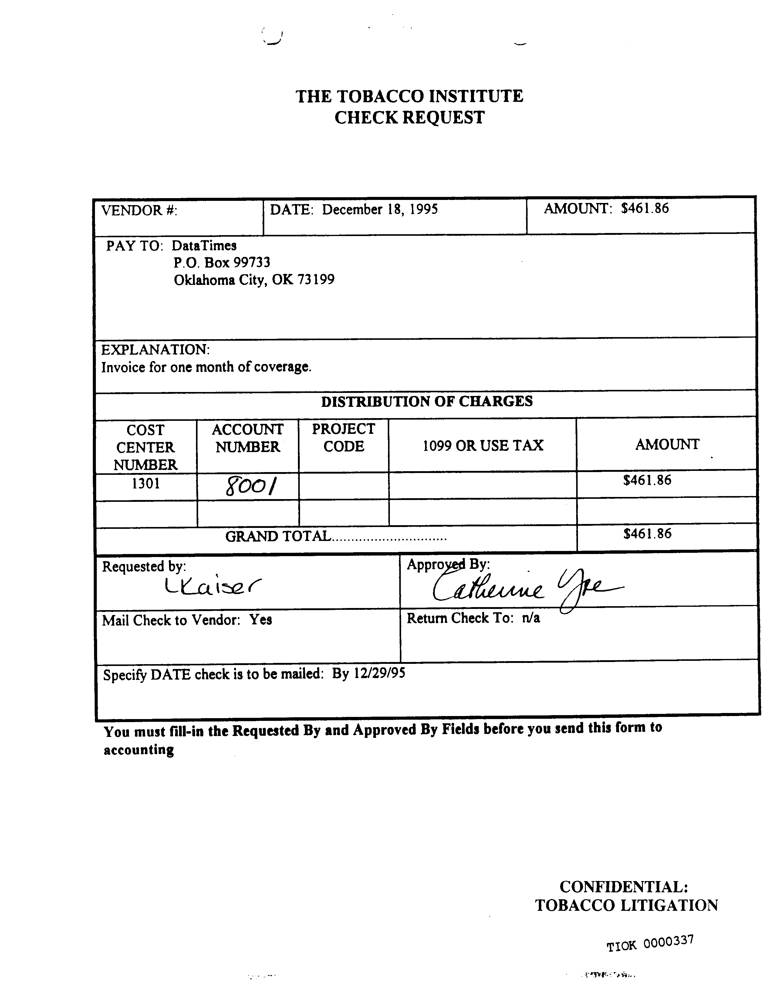

In [ ]:
from PIL import Image, ImageDraw, ImageFont

image = Image.open("/content/RVL_CDIP_one_example_per_class/budget/00000337.tif")
image = image.convert("RGB")
image

We can use the Tesseract OCR engine to turn the image into a list of recognized words:

In [ ]:
import pytesseract
import numpy as np

ocr_df = pytesseract.image_to_data(image, output_type='data.frame')
ocr_df = ocr_df.dropna().reset_index(drop=True)
float_cols = ocr_df.select_dtypes('float').columns
ocr_df[float_cols] = ocr_df[float_cols].round(0).astype(int)
ocr_df = ocr_df.replace(r'^\s*$', np.nan, regex=True)
words = ' '.join([word for word in ocr_df.text if str(word) != 'nan'])
words

'THE TOBACCO INSTITUTE CHECK REQUEST VENDOR # DATE: December 18, 1995 ‘AMOUNT: $461.86 PAY TO: DataTimes P.O. Box 99733 ‘Oklahoma City, OK 73199 EXPLANATION: Invoice for one month of coverage. DISTRIBUTION OF CHARGES PROJECT CODE 1099 OR USE TAX AMOUNT $461.86 $461.86 Requested by: Approyed By: Laisac Spe Mail Check to Vendor: Yes Return Check To: Specify DATE check is to be mailed: By 12/29/95 ‘You must fill-in the Requested By and Approved By Fields before you send this form to accounting CONFIDENTIAL: TOBACCO LITIGATION ‘r1oK 0000337'

However, we can use `LayoutLMv2Processor` to easily prepare the data for the model. We give a document image as input to the processor, and it will create `input_ids`, `attention_mask`, `token_type_ids` and `bbox` for us. Internally, it will apply PyTesseract to get the words and bounding boxes, it will normalize the bounding boxes according to the size of the image, and it will turn everything into token-level inputs. It will also resize the document image to 224x224, as the model also requires an `image` input. Handy, isn't it?

Btw, if you prefer to use your own OCR engine, you still can. In that case, you can provide your own words and (normalized) bounding boxes to the processor.

In [ ]:
from transformers import LayoutLMv2FeatureExtractor, LayoutLMv2Tokenizer, LayoutLMv2Processor

feature_extractor = LayoutLMv2FeatureExtractor()
tokenizer = LayoutLMv2Tokenizer.from_pretrained("microsoft/layoutlmv2-base-uncased")
processor = LayoutLMv2Processor(feature_extractor, tokenizer)

/usr/local/lib/python3.10/dist-packages/transformers/models/layoutlmv2/feature_extraction_layoutlmv2.py:30: FutureWarning: The class LayoutLMv2FeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use LayoutLMv2ImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

In [ ]:
encoded_inputs = processor(image, return_tensors="pt")

In [ ]:
for k,v in encoded_inputs.items():
  print(k, v.shape)

input_ids torch.Size([1, 150])
bbox torch.Size([1, 150, 4])
token_type_ids torch.Size([1, 150])
attention_mask torch.Size([1, 150])
image torch.Size([1, 3, 224, 224])


Let's check whether the `input_ids` are created correctly by decoding them back to text:

In [ ]:
processor.tokenizer.decode(encoded_inputs.input_ids.squeeze().tolist())

'[CLS] the tobacco institute check request vendor # date : december 18, 1995 ‘ amount : $ 461. 86 pay to : datatimes p. o. box 99733 ‘ oklahoma city, ok 73199 explanation : invoice for one month of coverage. distribution of charges project code 1099 or use tax amount $ 461. 86 $ 461. 86 requested by : approyed by : laisac spe mail check to vendor : yes return check to : n / a specify date check is to be mailed : by 12 / 29 / 95 ‘ you must fill - in the requested by and approved by fields before you send this form to accounting confidential : tobacco litigation ‘ r1ok 0000337 [SEP]'

Note that it also adds the special tokens ([CLS] and [SEP]). You can also pad to a max length, truncate, etc., just like you would do with a regular tokenizer.

## Preprocessing the data using 🤗 datasets

First, we convert the dataset into a Pandas dataframe, having 2 columns: image_path and label.

In [ ]:
import pandas as pd
import os

dataset_path = "/content/RVL_CDIP_one_example_per_class"
labels = [label for label in os.listdir(dataset_path)]
id2label = {v: k for v, k in enumerate(labels)}
label2id = {k: v for v, k in enumerate(labels)}
label2id

{'budget': 0,
 'news_article': 1,
 'handwritten': 2,
 'form': 3,
 'presentation': 4,
 'file_folder': 5,
 'memo': 6,
 'email': 7,
 'letter': 8,
 'advertisement': 9}

In [ ]:
images = []
labels = []

for label_folder, _, file_names in os.walk(dataset_path):
  if label_folder != dataset_path:
    label = label_folder[40:]
    for _, _, image_names in os.walk(label_folder):
      relative_image_names = []
      for image_file in image_names:
        relative_image_names.append(dataset_path + "/" + label + "/" + image_file)
      images.extend(relative_image_names)
      labels.extend([label] * len (relative_image_names))

data = pd.DataFrame.from_dict({'image_path': images, 'label': labels})
data.head()

,image_path,label
0,/content/RVL_CDIP_one_example_per_class/budget...,budget
1,/content/RVL_CDIP_one_example_per_class/budget...,budget
2,/content/RVL_CDIP_one_example_per_class/budget...,budget
3,/content/RVL_CDIP_one_example_per_class/budget...,budget
4,/content/RVL_CDIP_one_example_per_class/budget...,budget


In [ ]:
from datasets import Dataset

# read dataframe as HuggingFace Datasets object
dataset = Dataset.from_pandas(data)

In [ ]:
dataset

Dataset({
    features: ['image_path', 'label'],
    num_rows: 104
})

In [ ]:
from datasets import Features, Sequence, ClassLabel, Value, Array2D, Array3D

labels = list(set(labels))

# we need to define custom features
features = Features({
    'image': Array3D(dtype="float32", shape=(3, 224, 224)),
    'input_ids': Sequence(feature=Value(dtype='int64')),
    'attention_mask': Sequence(Value(dtype='int64')),
    'token_type_ids': Sequence(Value(dtype='int64')),
    'bbox': Array2D(dtype="int64", shape=(512, 4)),
    'labels': ClassLabel(num_classes=len(labels), names=labels),
})

def preprocess_data(examples):
  # take a batch of images
  images = [Image.open(path).convert("RGB") for path in examples['image_path']]

  encoded_inputs = processor(images, padding="max_length", truncation=True)

  # add labels
  encoded_inputs["labels"] = [label2id[label] for label in examples["label"]]

  return encoded_inputs

encoded_dataset = dataset.map(preprocess_data, remove_columns=dataset.column_names, features=features,
                              batched=True, batch_size=8)

Map:   0%|          | 0/104 [00:00<?, ? examples/s]

Next, we set the format to PyTorch tensors. We also specify to put everything on the GPU (CUDA).

In [ ]:
encoded_dataset.set_format(type="torch", device="cuda")

We can create a PyTorch dataloader now:

In [ ]:
import torch

dataloader = torch.utils.data.DataLoader(encoded_dataset, batch_size=4)
batch = next(iter(dataloader))

In [ ]:
for k,v in batch.items():
  print(k, v.shape)

image torch.Size([4, 3, 224, 224])
input_ids torch.Size([4, 512])
attention_mask torch.Size([4, 512])
token_type_ids torch.Size([4, 512])
bbox torch.Size([4, 512, 4])
labels torch.Size([4])


In [ ]:
processor.tokenizer.decode(batch['input_ids'][0].tolist())

'[CLS] big mo parking co. j 414 east 4th - tulsa, oklahoma 74120 ~ ( 918 ) 582 - 2434 35 p / mailing address : p. o. box 1189, tulsa, oklahoma 74101 = august 15, 1995 bill white co, fax # 582 - 1239 mr. ron morris tobacco institut eived ) 1875. 1 street nw. suite 800 received ) washington, 0. c. 20006 aug 3 0 1995 accounting invoice : “ southern legislative conference " date : monday, august 14, 1995 activity : 7 : 30pm - 10 : 30pm = 3 hrs. pick up group at adam\'s mark hotel and take to doubletree hotel - - warren place for dinner - return group to adam\'s mark after dinner. billing : 3 hrs. @ $ 35, 00 / hr, = $ 105. 00 sales tax ( 75 % ) = $ 7. 88 total = $ 112. 88 total invoice = $ 112. 88 net : 10 days = confidential : camer ation ae tobacco litigatio! saag ) ‘ shuttle vans for charter tiok 0000334 managing 12 acres of family owned downtown tulsa real estate [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]

In [ ]:
id2label[batch['labels'][0].item()]

'budget'

## Define the model

Here we define the model, namely `LayoutLMv2ForSequenceClassification`. We initialize it with the weights of the pre-trained base model (`LayoutLMModel`). The weights of the classification head are randomly initialized, and will be fine-tuned together with the weights of the base model on our tiny dataset. Once loaded, we move it to the GPU.

In [ ]:
# !python --version

Python 3.10.12


In [ ]:
from transformers import LayoutLMv2ForSequenceClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LayoutLMv2ForSequenceClassification.from_pretrained("microsoft/layoutlmv2-base-uncased",
                                                            num_labels=len(labels))
model.to(device)

Some weights of LayoutLMv2ForSequenceClassification were not initialized from the model checkpoint at microsoft/layoutlmv2-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


LayoutLMv2ForSequenceClassification(
  (layoutlmv2): LayoutLMv2Model(
    (embeddings): LayoutLMv2Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (x_position_embeddings): Embedding(1024, 128)
      (y_position_embeddings): Embedding(1024, 128)
      (h_position_embeddings): Embedding(1024, 128)
      (w_position_embeddings): Embedding(1024, 128)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (visual): LayoutLMv2VisualBackbone(
      (backbone): FPN(
        (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
        (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
        (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

## Train the model

Here we train the model in familiar PyTorch fashion. We use the Adam optimizer with weight decay fix (normally you can also specify which variables should have weight decay and which not + a learning rate scheduler, see here for how the authors of LayoutLM did this), and train for 30 epochs. If the model is able to overfit it, then it means there are no issues and we can train it on the entire dataset.

In [ ]:
from transformers import AdamW
from tqdm.notebook import tqdm

optimizer = AdamW(model.parameters(), lr=1e-5)

global_step = 0
num_train_epochs = 10
t_total = len(dataloader) * num_train_epochs  # total number of training steps

# Put the model in training mode
model.train()

# # Specify the directory to save models
# save_dir = "saved_models"
# os.makedirs(save_dir, exist_ok=True)  # Create the directory if it doesn't exist

for epoch in range(num_train_epochs):
    print("Epoch:", epoch)
    running_loss = 0.0
    correct = 0

    for batch in tqdm(dataloader):
        # Forward pass
        outputs = model(**batch)
        loss = outputs.loss

        running_loss += loss.item()
        predictions = outputs.logits.argmax(-1)
        correct += (predictions == batch['labels']).float().sum()

        # Backward pass and update
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        global_step += 1

    # # Save the model after each epoch
    # print("Saving model for epoch", epoch)
    # torch.save(model.state_dict(), os.path.join(save_dir, f"model_epoch_{epoch}.pt"))

    # Calculate and print metrics
    print("Loss:", running_loss / batch["input_ids"].shape[0])
    accuracy = 100 * correct / len(data)
    print("Training accuracy:", accuracy.item())



Epoch: 0


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/26 [00:00<?, ?it/s]

Loss: 16.69212120771408
Training accuracy: 7.692307949066162
Epoch: 1


  0%|          | 0/26 [00:00<?, ?it/s]

Loss: 14.831718742847443
Training accuracy: 6.730769634246826
Epoch: 2


  0%|          | 0/26 [00:00<?, ?it/s]

Loss: 13.69344899058342
Training accuracy: 22.115385055541992
Epoch: 3


  0%|          | 0/26 [00:00<?, ?it/s]

Loss: 12.452758982777596
Training accuracy: 36.5384635925293
Epoch: 4


  0%|          | 0/26 [00:00<?, ?it/s]

Loss: 11.522818610072136
Training accuracy: 44.230770111083984
Epoch: 5


  0%|          | 0/26 [00:00<?, ?it/s]

Loss: 10.470116257667542
Training accuracy: 54.80769348144531
Epoch: 6


  0%|          | 0/26 [00:00<?, ?it/s]

Loss: 9.22363916784525
Training accuracy: 68.26923370361328
Epoch: 7


  0%|          | 0/26 [00:00<?, ?it/s]

Loss: 8.111781068146229
Training accuracy: 79.80769348144531
Epoch: 8


  0%|          | 0/26 [00:00<?, ?it/s]

Loss: 7.133727289736271
Training accuracy: 81.73077392578125
Epoch: 9


  0%|          | 0/26 [00:00<?, ?it/s]

Loss: 6.364000469446182
Training accuracy: 84.61538696289062


## Inference

To perform inference on a new document image, 3 things need to be done:

1. prepare the image for the model using `LayoutLMv2Processor`
2. forward pass through the model
3. convert the output of the model to an actual label name

Let's take the first image of the training dataset as an example.

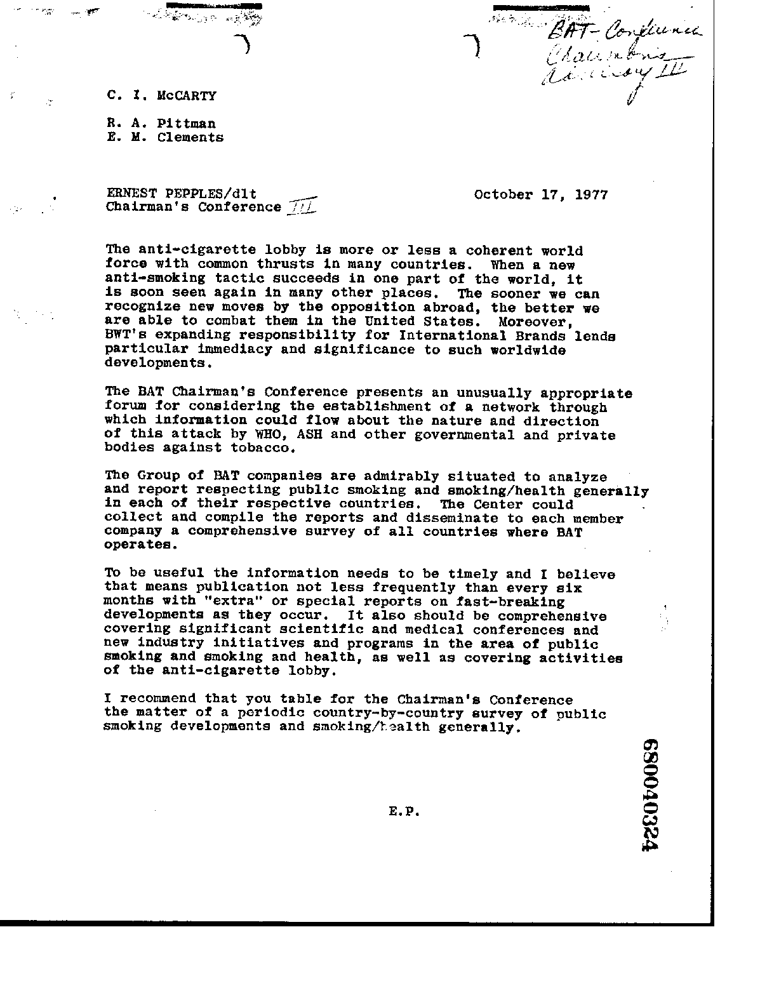

In [ ]:
image = Image.open("/content/0000035220.tif")
image = image.convert("RGB")
image

In [ ]:
# prepare image for the model
encoded_inputs = processor(image, return_tensors="pt")

# make sure all keys of encoded_inputs are on the same device as the model
for k,v in encoded_inputs.items():
  encoded_inputs[k] = v.to(model.device)

# forward pass
outputs = model(**encoded_inputs)

The model outputs `logits` of shape (batch_size, num_labels):

In [ ]:
logits = outputs.logits
print(logits.shape)

torch.Size([1, 10])


We simply take the largest logit (i.e. `argmax` on the last dimension), and convert it back to a string using the `id2label` dictionary we created earlier.

In [ ]:
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", id2label[predicted_class_idx])

Predicted class: memo


In [ ]:
# import torch

# # Assuming you have your trained model loaded as `model`

# # Choose a descriptive filename and path for the saved model
# model_filename = "doc_classifier.pt"
# model_path = os.path.join("/content/mod", model_filename)

# # Save the model using torch.save
# torch.save(model, model_path)
# print(f"Model saved successfully to {model_path}")

In [ ]:
# # Assuming you have processed data to save (e.g., encoded_inputs, predicted_class_idx)
# import pickle
# # Choose a filename and path for the pickle file
# filename = "data.pkl"
# file_path = os.path.join("/content/pic", filename)

# # Save data to pickle file securely
# with open(file_path, "wb") as file:
#     data_to_save = {
#         "encoded_inputs": encoded_inputs,
#         "predicted_class_idx": predicted_class_idx,
#         # Add other relevant data as needed
#     }
#     pickle.dump(data_to_save, file)
#     print(f"Data saved successfully to {file_path}")

In [ ]:
# print("Saving trained model to Colab Files...")
# torch.save(model.state_dict(), "/content/model.pt")  # Upload "model.pt" to Colab Files


Saving trained model to Colab Files...
